First 5 Rows:
    Engine_Size  Mileage  Age  Horsepower  Price
0          1.2       90    8          80    3.5
1          1.5       70    6          95    5.0
2          1.8       60    5         110    6.0
3          2.0       50    4         130    8.0
4          2.2       40    3         150   10.0

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Engine_Size  15 non-null     float64
 1   Mileage      15 non-null     int64  
 2   Age          15 non-null     int64  
 3   Horsepower   15 non-null     int64  
 4   Price        15 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 732.0 bytes
None

Statistical Summary:
        Engine_Size    Mileage        Age  Horsepower      Price
count    15.000000  15.000000  15.000000   15.000000  15.000000
mean      1.806667  57.000000   4.600000  124.333333   7.846667
std       

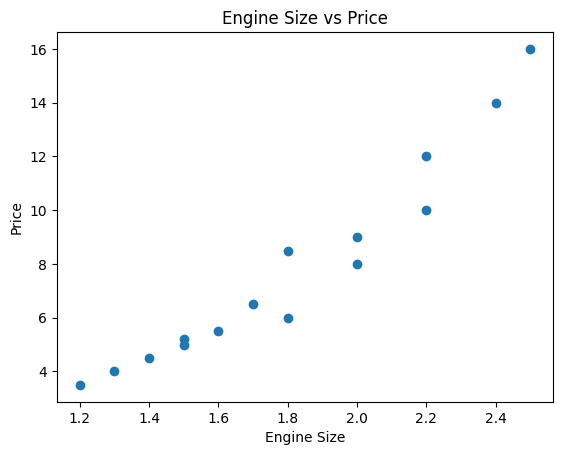

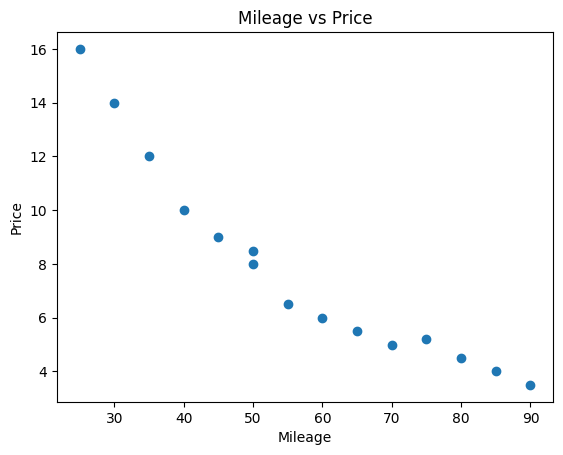

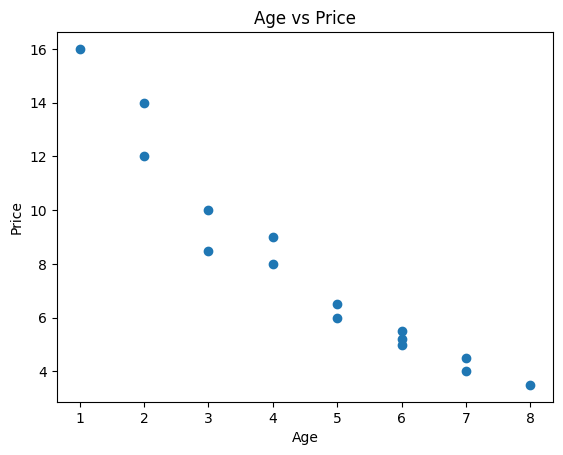

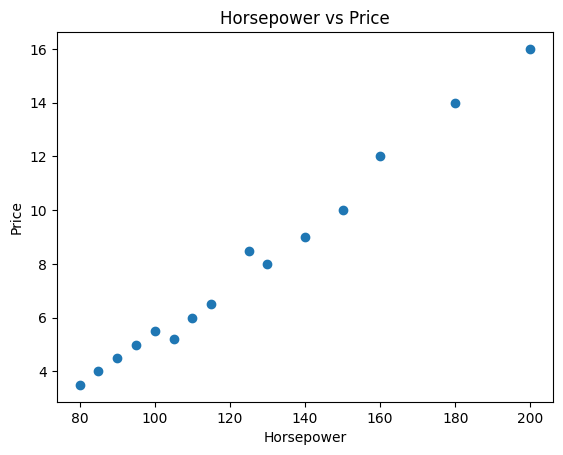


Intercept (b0): 0.24841323195327902

Coefficients:
Engine_Size : -2.550648500162271
Mileage : -0.00035768927627617686
Age : -0.3966094278826092
Horsepower : 0.11243457044832855

Actual Prices: [ 4.5 16.   3.5]
Predicted Prices: [ 3.99173553 15.95315441  2.97733321]

Mean Absolute Error (MAE): 0.3592589480272615
R2 Score: 0.9944693487104426

Predicted Price for New Car: 10.808165944179146 Lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
"""Scenario: Predicting Used Car Prices
A used car dealership wants to predict the selling price of cars based on:

Engine Size (Liters) ⚙️

Mileage (thousand km driven) 🛣️

Car Age (years) 📅

Horsepower 💨

They perform EDA to understand patterns and then build a Multiple Linear Regression model.Use the below dataset for your analysis"""
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Create Dataset
data = {
    "Engine_Size": [1.2,1.5,1.8,2.0,2.2,1.3,1.6,2.4,2.0,1.4,1.7,2.5,1.8,2.2,1.5],
    "Mileage": [90,70,60,50,40,85,65,30,45,80,55,25,50,35,75],
    "Age": [8,6,5,4,3,7,6,2,4,7,5,1,3,2,6],
    "Horsepower": [80,95,110,130,150,85,100,180,140,90,115,200,125,160,105],
    "Price": [3.5,5,6,8,10,4,5.5,14,9,4.5,6.5,16,8.5,12,5.2]
}
df = pd.DataFrame(data)
print("First 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe())

# Step 3: Exploratory Data Analysis (EDA)
# Correlation Matrix
print("\nCorrelation Matrix:\n", df.corr())
# plots
plt.figure()
plt.scatter(df["Engine_Size"], df["Price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()

plt.figure()
plt.scatter(df["Mileage"], df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()

plt.figure()
plt.scatter(df["Age"], df["Price"])
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Age vs Price")
plt.show()

plt.figure()
plt.scatter(df["Horsepower"], df["Price"])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.show()

# Step 4: Define Features (X) and Target (y)
X = df[["Engine_Size", "Mileage", "Age", "Horsepower"]]
y = df["Price"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nIntercept (b0):", model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} : {coef}")

# Step 7: Predictions
y_pred = model.predict(X_test)
print("\nActual Prices:", y_test.values)
print("Predicted Prices:", y_pred)

# Step 8: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

# Step 9: Predict New Car Price
# Example: 2.0L engine, 40k km, 3 years old, 150 HP
new_car = np.array([[2.0, 40, 3, 150]])
predicted_price = model.predict(new_car)
print("\nPredicted Price for New Car:", predicted_price[0], "Lakhs")